# Description

In this lab, we'll learn how to use the three main PyTorch building blocks to build neural networks: Module, Sequences, and ModuleList.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets

import warnings
warnings.filterwarnings("ignore")

# Tasks

Task 1. Create a classic CNN classifier (nn.Module).

In [2]:
class MyCNNClassifier(nn.Module):
    
    def __init__(self, in_c, n_classes):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_c, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)

        self.fc1 = nn.Linear(32*28*28, 1024)
        self.fc2 = nn.Linear(1024, n_classes)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.fc1(x)
        x = F.sigmoid(x)
        
        x = self.fc2(x)
        
        return x

In [3]:
model = MyCNNClassifier(1, 10)
model

MyCNNClassifier(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=25088, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

Task 2. Create a classic CNN classifier (nn.Sequences).

In [4]:
class MyCNNClassifier(nn.Module):
    
    def __init__(self, in_c, n_classes):
        super().__init__()
        
        self.conv_block1 = nn.Sequential(nn.Conv2d(in_c, 32, kernel_size=3, stride=1, padding=1),
                                         nn.BatchNorm2d(32),
                                         nn.ReLU())
        
        self.conv_block2 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
                                         nn.BatchNorm2d(64),
                                         nn.ReLU())
        
        self.decoder = nn.Sequential(nn.Linear(32*28*28, 1024),
                                     nn.Sigmoid(),
                                     nn.Linear(1024, n_classes))
        
    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.decoder(x)
        
        return x

In [5]:
model = MyCNNClassifier(1, 10)
model

MyCNNClassifier(
  (conv_block1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=25088, out_features=1024, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=1024, out_features=10, bias=True)
  )
)

Task 3. Create a function that overwrites nn.Sequences to simplify the code (nn.Sequences).

In [6]:
def conv_block(in_f, out_f, *args, **kwargs):
    return nn.Sequential(nn.Conv2d(in_f, out_f, *args, **kwargs),
                         nn.BatchNorm2d(out_f),
                         nn.ReLU())

In [7]:
class MyCNNClassifier(nn.Module):
    
    def __init__(self, in_c, n_classes):
        super().__init__()
        
        self.conv_block1 = conv_block(in_c, 32, kernel_size=3, padding=1)
        self.conv_block2 = conv_block(32, 64, kernel_size=3, padding=1)
        
        self.decoder = nn.Sequential(nn.Linear(32*28*28, 1024),
                                     nn.Sigmoid(),
                                     nn.Linear(1024, n_classes))
        
        def forward(self, x):
            x = self.conv_block1(x)
            x = self.conv_block2(x)
            x = x.view(x.size(0), -1)
            x = self.decoder(x)
            return x

In [8]:
model = MyCNNClassifier(1, 10)
model

MyCNNClassifier(
  (conv_block1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=25088, out_features=1024, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=1024, out_features=10, bias=True)
  )
)

Task 4. Combine convolutional blocks with nn.Sequences.

In [9]:
class MyCNNClassifier(nn.Module):
    
    def __init__(self, in_c, n_classes):
        super().__init__()
        
        self.encoder = nn.Sequential(conv_block(in_c, 32, kernel_size=3, padding=1),
                                     conv_block(32, 64, kernel_size=3, padding=1))
        
        self.decoder = nn.Sequential(nn.Linear(32 * 28 * 28, 1024),
                                     nn.Sigmoid(),
                                     nn.Linear(1024, n_classes))

    def forward(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1)
        x = self.decoder(x)
        
        return x

In [10]:
model = MyCNNClassifier(1, 10)
model

MyCNNClassifier(
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
  )
  (decoder): Sequential(
    (0): Linear(in_features=25088, out_features=1024, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=1024, out_features=10, bias=True)
  )
)

Task 5. Dynamic Sequential: create multiple layers at once (nn.Sequential).

In [11]:
class MyCNNClassifier(nn.Module):
    
    def __init__(self, in_c, n_classes):
        super().__init__()
        
        self.enc_sizes = [in_c, 32, 64]
        conv_blocks = [conv_block(in_f, out_f, kernel_size=3, padding=1)
                       for in_f, out_f in zip(self.enc_sizes, self.enc_sizes[1:])]

        self.encoder = nn.Sequential(*conv_blocks)
        self.decoder = nn.Sequential(nn.Linear(32 * 28 * 28, 1024),
                                     nn.Sigmoid(),
                                     nn.Linear(1024, n_classes))
        
        def forward(self, x):
            x = self.encoder(x)
            x = x.view(x.size(0), -1)
            x = self.decoder(x)
            
            return x

In [12]:
model = MyCNNClassifier(1, 10)
model

MyCNNClassifier(
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
  )
  (decoder): Sequential(
    (0): Linear(in_features=25088, out_features=1024, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=1024, out_features=10, bias=True)
  )
)

Task 6. Dynamize the decoder part. 

In [13]:
def dec_block(in_f, out_f):
    return nn.Sequential(nn.Linear(in_f, out_f), nn.Sigmoid())

In [14]:
class MyCNNClassifier(nn.Module):
    
    def __init__(self, in_c, enc_sizes, dec_sizes, n_classes):
        super().__init__()
        
        self.enc_sizes = [in_c, *enc_sizes]
        self.dec_sizes = [32 * 28 * 28, *dec_sizes]
        
        conv_blokcs = [conv_block(in_f, out_f, kernel_size=3, padding=1) 
                       for in_f, out_f in zip(self.enc_sizes, self.enc_sizes[1:])]
        self.encoder = nn.Sequential(*conv_blokcs) 
        
        dec_blocks = [dec_block(in_f, out_f)
                      for in_f, out_f in zip(self.dec_sizes, self.dec_sizes[1:])]
        self.decoder = nn.Sequential(*dec_blocks)
        
        self.last = nn.Linear(self.dec_sizes[-1], n_classes)
        
    def forward(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1)
        x = self.decoder(x)
     
        return x

In [15]:
model = MyCNNClassifier(1, [32,64], [1024, 512], 10)
model

MyCNNClassifier(
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
  )
  (decoder): Sequential(
    (0): Sequential(
      (0): Linear(in_features=25088, out_features=1024, bias=True)
      (1): Sigmoid()
    )
    (1): Sequential(
      (0): Linear(in_features=1024, out_features=512, bias=True)
      (1): Sigmoid()
    )
  )
  (last): Linear(in_features=512, out_features=10, bias=True)
)

Task 7. Break the model in two (Encoder + Decoder).

In [16]:
class MyEncoder(nn.Module):
    
    def __init__(self, enc_sizes):
        super().__init__()
        self.conv_blokcs = nn.Sequential(*[conv_block(in_f, out_f, kernel_size=3, padding=1)
                                           for in_f, out_f in zip(enc_sizes, enc_sizes[1:])])
    
    def forward(self, x):
        return self.conv_blokcs(x)

In [17]:
class MyDecoder(nn.Module):
    
    def __init__(self, dec_sizes, n_classes):
        super().__init__()
        self.dec_blocks = nn.Sequential(*[dec_block(in_f, out_f)
                                          for in_f, out_f in zip(dec_sizes, dec_sizes[1:])])
        
        self.last = nn.Linear(dec_sizes[-1], n_classes)
    
    def forward(self, x):
        return self.dec_blocks()

In [18]:
class MyCNNClassifier(nn.Module):
    
    def __init__(self, in_c, enc_sizes, dec_sizes, n_classes):
        super().__init__()
        
        self.enc_sizes = [in_c, *enc_sizes]
        self.dec_sizes = [32 * 28 * 28, *dec_sizes]
        self.encoder = MyEncoder(self.enc_sizes)
        self.decoder = MyDecoder(dec_sizes, n_classes)

    def forward(self, x):
        x = self.encoder(x)
        x = x.flatten(1)
        x = self.decoder(x)
        return x

In [19]:
model = MyCNNClassifier(1, [32,64], [1024, 512], 10)
model

MyCNNClassifier(
  (encoder): MyEncoder(
    (conv_blokcs): Sequential(
      (0): Sequential(
        (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (1): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
  )
  (decoder): MyDecoder(
    (dec_blocks): Sequential(
      (0): Sequential(
        (0): Linear(in_features=1024, out_features=512, bias=True)
        (1): Sigmoid()
      )
    )
    (last): Linear(in_features=512, out_features=10, bias=True)
  )
)

Task 8. Create a model using ModuleList.

In [20]:
class MyModule(nn.Module):
    
    def __init__(self, sizes):
        super().__init__()
        
        self.layers = nn.ModuleList([nn.Linear(in_f, out_f) for in_f, out_f in zip(sizes, sizes[1:])])
        self.trace = []

    def forward(self,x):
        for layer in self.layers:
            x = layer(x)
            self.trace.append(x)
            
        return x

In [21]:
model = MyModule([1, 16, 32])
model(torch.rand((4,1)))

[print(trace.shape) for trace in model.trace]

torch.Size([4, 16])
torch.Size([4, 32])


[None, None]

Task 9. Create a model using ModuleDict.

In [22]:
def conv_block(in_f, out_f, activation='relu', *args, **kwargs):
    activations = nn.ModuleDict([['lrelu', nn.LeakyReLU()], ['relu', nn.ReLU()]])
    
    return nn.Sequential(nn.Conv2d(in_f, out_f, *args, **kwargs),
                         nn.BatchNorm2d(out_f),
                         activations[activation])

In [23]:
print(conv_block(1, 32,'lrelu', kernel_size=3, padding=1))
print(conv_block(1, 32,'relu', kernel_size=3, padding=1))

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): LeakyReLU(negative_slope=0.01)
)
Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
)


Task 10. The final implementation of the model.

In [24]:
def conv_block(in_f, out_f, activation='relu', *args, **kwargs):
    activations = nn.ModuleDict([['lrelu', nn.LeakyReLU()], ['relu', nn.ReLU()]])
    
    return nn.Sequential(nn.Conv2d(in_f, out_f, *args, **kwargs),
                         nn.BatchNorm2d(out_f),
                         activations[activation])

In [25]:
def dec_block(in_f, out_f):
    return nn.Sequential(nn.Linear(in_f, out_f),
                         nn.Sigmoid())

In [26]:
class MyEncoder(nn.Module):
    
    def __init__(self, enc_sizes, *args, **kwargs):
        super().__init__()
        
        self.conv_blokcs = nn.Sequential(*[conv_block(in_f, out_f, kernel_size=3, padding=1, *args, **kwargs)
                                          for in_f, out_f in zip(enc_sizes, enc_sizes[1:])])

    def forward(self, x):
        return self.conv_blokcs(x)

In [27]:
class MyDecoder(nn.Module):
    
    def __init__(self, dec_sizes, n_classes):
        super().__init__()
        
        self.dec_blocks = nn.Sequential(*[dec_block(in_f, out_f) 
                                         for in_f, out_f in zip(dec_sizes, dec_sizes[1:])])
        self.last = nn.Linear(dec_sizes[-1], n_classes)
        
    def forward(self, x):
        x = self.dec_blocks(x)
        return self.last(x)

In [28]:
class MyCNNClassifier(nn.Module):
    
    def __init__(self, in_c, enc_sizes, dec_sizes, n_classes, activation='relu'):
        super().__init__()

        self.enc_sizes = [in_c, *enc_sizes]
        self.dec_sizes = [16 * 28 * 28, *dec_sizes]
        self.encoder = MyEncoder(self.enc_sizes, activation=activation)
        self.decoder = MyDecoder(self.dec_sizes, n_classes)
        
    def forward(self, x):
        x = self.encoder(x)
        x = x.flatten(1)
        x = self.decoder(x)
        return x

In [29]:
model = MyCNNClassifier(1, [6, 16], [120, 84], 10, activation='lrelu')
model

MyCNNClassifier(
  (encoder): MyEncoder(
    (conv_blokcs): Sequential(
      (0): Sequential(
        (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.01)
      )
      (1): Sequential(
        (0): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.01)
      )
    )
  )
  (decoder): MyDecoder(
    (dec_blocks): Sequential(
      (0): Sequential(
        (0): Linear(in_features=12544, out_features=120, bias=True)
        (1): Sigmoid()
      )
      (1): Sequential(
        (0): Linear(in_features=120, out_features=84, bias=True)
        (1): Sigmoid()
      )
    )
    (last): Linear(in_features=84, out_features=10, bias=True)
  )
)

Task 11. Use the resulting neural network to classify handwritten numbers (MNIST dataset).

__Data preparation__

In [30]:
mnist_train = torchvision.datasets.MNIST('./', download=True, train=True)
mnist_test = torchvision.datasets.MNIST('./', download=True, train=False)
X_train = mnist_train.train_data
y_train = mnist_train.train_labels
X_test = mnist_test.test_data
y_test = mnist_test.test_labels

tensor(5)


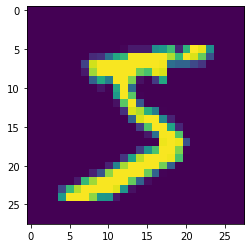

In [31]:
# display an example of the data
plt.imshow(X_train[0, :, :])
print(y_train[0])

In [32]:
# reshape the data
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [33]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

torch.Size([60000, 1, 28, 28]) torch.Size([10000, 1, 28, 28])
torch.Size([60000]) torch.Size([10000])


__Model__

In [34]:
model_mnist = MyCNNClassifier(1, [6, 16], [120, 84], 10, activation='relu')
model_mnist

MyCNNClassifier(
  (encoder): MyEncoder(
    (conv_blokcs): Sequential(
      (0): Sequential(
        (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (1): Sequential(
        (0): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
  )
  (decoder): MyDecoder(
    (dec_blocks): Sequential(
      (0): Sequential(
        (0): Linear(in_features=12544, out_features=120, bias=True)
        (1): Sigmoid()
      )
      (1): Sequential(
        (0): Linear(in_features=120, out_features=84, bias=True)
        (1): Sigmoid()
      )
    )
    (last): Linear(in_features=84, out_features=10, bias=True)
  )
)

__Loss and Optimizer__

In [35]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
X_test = X_test.to(device)
y_test = y_test.to(device)
model_mnist = model_mnist.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_mnist.parameters(), lr=1e-3)

__Model training__

In [36]:
batch_size = 100
test_accuracy_history = []
test_loss_history = []

for epoch in range(30):
    order = np.random.permutation(len(X_train))

    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        model_mnist.train()

        batch_indexes = order[start_index:start_index+batch_size]
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        preds = model_mnist.forward(X_batch)
        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    with torch.no_grad():
        model_mnist.eval()

        test_preds = model_mnist.forward(X_test)
        test_loss_history.append(loss(test_preds, y_test).data.cpu())

        accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
        test_accuracy_history.append(accuracy)

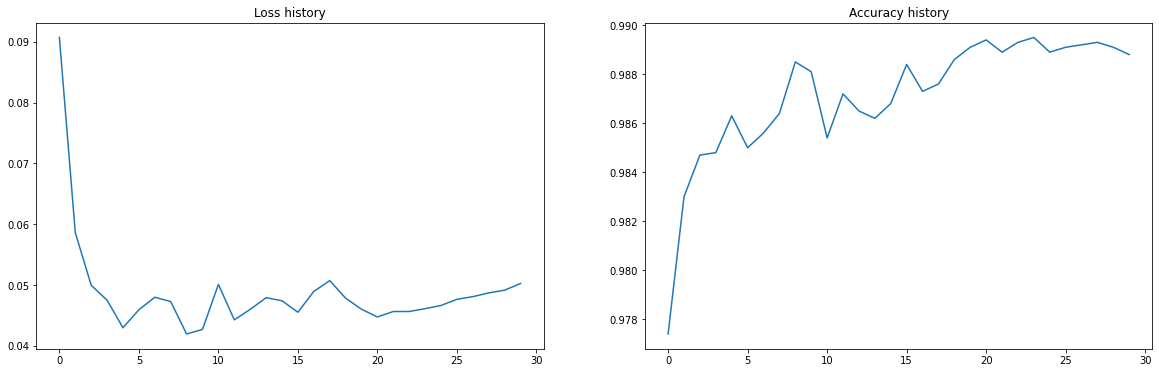

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(test_loss_history)
ax[0].title.set_text('Loss history')

ax[1].plot(test_accuracy_history)
ax[1].title.set_text('Accuracy history')